In [1]:
from music21 import *

In [2]:
from music21 import environment

env = environment.UserSettings()

# Check current MuseScore path
print(env['musescoreDirectPNGPath'])

# Set the correct path to your MuseScore executable
env['musescoreDirectPNGPath'] = r'D:\App\MuseScore4\bin\MuseScore4.exe'

D:\App\MuseScore4\bin\MuseScore4.exe


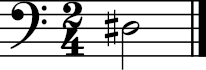

In [3]:
n = note.Note("D#3")
n.duration.type = 'half'
n.show()

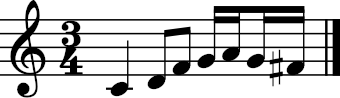

In [4]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

In [5]:
# Save as MIDI file
littleMelody.write('midi', fp='littleMelody.mid')

'littleMelody.mid'

In [6]:
def play_midi(file_path):
    mf = midi.MidiFile()
    mf.open(file_path)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    sp = midi.realtime.StreamPlayer(s)
    sp.play()

In [7]:
play_midi("./littleMelody.mid")

pygame 2.6.1 (SDL 2.28.4, Python 3.8.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
#You can add a brace (also called a bracket or brace symbol) using part (small section) and score (entirely) streams.

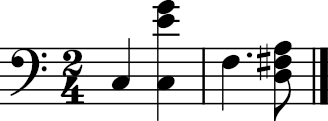

In [9]:
#Make a chord (combine of many music note)
class ChordState(tinyNotation.State):
    def affectTokenAfterParse(self, n):
       super(ChordState, self).affectTokenAfterParse(n)
       return None # do not append Note object

    def end(self):
        ch = chord.Chord(self.affectedTokens)
        ch.duration = self.affectedTokens[0].duration
        return ch
        
# Step 2: Create TinyNotationConverter
tnc = tinyNotation.Converter()

tnc.bracketStateMapping['chord'] = ChordState
tnc.load("2/4 C4 chord{C4 e g} F.4 chord{D8 F# A}")
tnc.parse().stream.show()

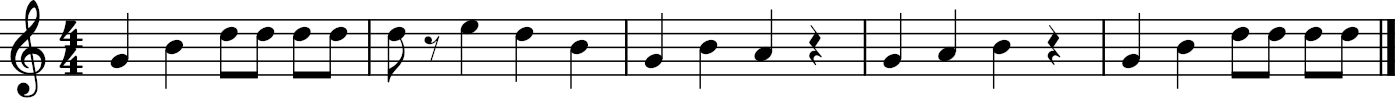

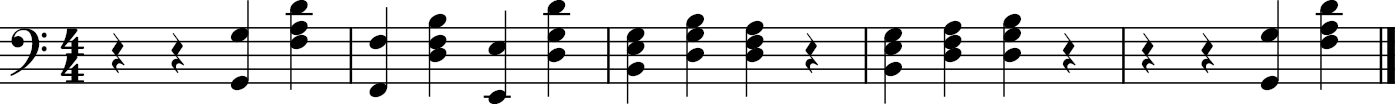

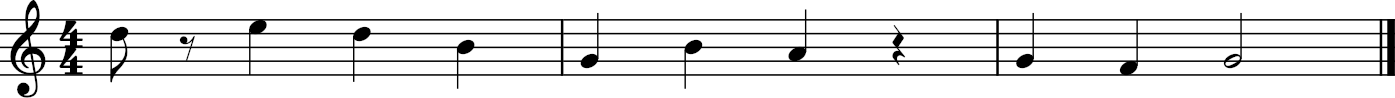

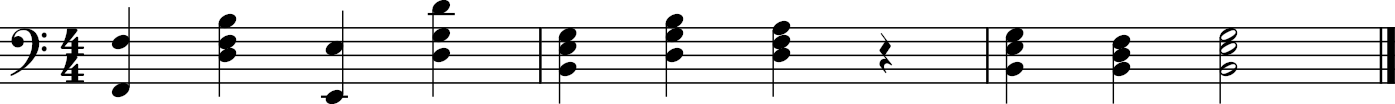

'lingangu.mid'

In [11]:
# Parse lines (add explicit 4/4 in second line)
line1 = converter.parse("tinynotation: 4/4 g b d'8 d' d' d' | d'8 r8 e'4 d'4 b4 | g b a r4 | g a b r4 | g b d'8 d' d' d'")
bass1 = converter.parse("tinynotation: 4/4 r4 r4 chord{GG G} chord{d A F} | chord{FF F} chord{B F D} chord{E EE} chord{d G D} | chord{G E BB} chord{B G D} chord{A F D} r4 | chord{G E BB} chord{A F D} chord{B G D} r4 | r4 r4 chord{G GG} chord{d A F}")
line2 = converter.parse("tinynotation: 4/4 d'8 r8 e'4 d'4 b4 | g b a r4 | g f g2")
bass2 = converter.parse("tinynotation: 4/4 chord{F FF} chord{B F D} chord{E EE} chord{d G D} | chord{G E BB} chord{B G D} chord{A F D} r4 | chord{G BB E} chord{F D BB} chord{G2 BB2 E2}")
# Show lines separately
line1.show()
bass1.show()
line2.show()
bass2.show()

# Combine melody parts into one Part
melody_part = stream.Part()
for meas in line1.getElementsByClass('Measure'):
    melody_part.append(meas)
for meas in line2.getElementsByClass('Measure'):
    melody_part.append(meas)

# Combine bass parts into another Part
bass_part = stream.Part()
for meas in bass1.getElementsByClass('Measure'):
    bass_part.append(meas)
for meas in bass2.getElementsByClass('Measure'):
    bass_part.append(meas)

# Create the Score and add both Parts
score = stream.Score()
score.insert(0, melody_part)
score.insert(0, bass_part)

# Write to MIDI
score.write('midi', fp='lingangu.mid')


In [13]:
play_midi("./lingangu.mid")